# Project 3: Multi Agent MDP

# The Invader/Defender Problem

The invader/defender problem is an example task where one agent tries to invade a territory, while the other agent tries to defend it. The task is defined as follows:
- Time is broken up into discrete epochs.
- The world is a square area that is broken up into a 6-by-6 grid of cells.
- There are two players or agents; both of them can move up, down, left, or right. At each time step, both players take their action simultaneously. Each cannot see the others' action at that time step, but the state of the  system and previous actions are fully observable to each. If the chosen action takes an agent outside of the grid, then the agent remains in the current position.
- The invader, marked I, starts in the upper-left corner of the world. The defender, marked D, starts in the bottom-left corner of the world.
- The 9 cells centered around the defender's current position (see Figure 1), is the region where the invader will be captured. The game ends whenever the invader is captured by the defender, or the invader enters the fixed territory cell marked T, whichever comes first.
- The goal of the defender is to capture the invader as far away as possible from the territory T. The goal of the invader is to move as close as possible to the territory T before being captured.
<img src=invader-defender.png>

## Part A - Modelling

Now, you are asked to implement the behavior of the invader/defender
domain in a Python file. Create a python file called InvaderDefender.py. You
may want to define a class consisting of the following:
- A function that returns a list of possible states in this stochastic game.
- A function that takes a state in the stochastic game, and returns whether or not it is terminal.
- A function that takes the state of the stochastic game, and returns the immediate reward.
- A function that takes the state and actions of each agent, and returns the next state the game will transition to at the next time step.

In [1]:
class InvaderDefender:
    def __init__(self, initial_state = ((1, 1),(6, 1))):
        self.initial = initial_state
    
    def initial_state(self):
        # return the initial state of this MDP
        self.initial = ((1, 1),(6, 1))
        return self.initial
    
    def states(self):
    # A function that returns a list of possible states in this stochastic game
    # states represent ((player 1 position) , (player 2 position))
        states = [
                ((1, 1),(1, 2)),((2, 1),(1, 1)),((3, 1),(1, 1)),((4, 1),(1, 1)),((5, 1),(1, 1)),((6, 1),(1, 1)),
                ((1, 1),(1, 3)),((2, 1),(1, 2)),((3, 1),(1, 2)),((4, 1),(1, 2)),((5, 1),(1, 2)),((6, 1),(1, 2)),
                ((1, 1),(1, 4)),((2, 1),(1, 3)),((3, 1),(1, 3)),((4, 1),(1, 3)),((5, 1),(1, 3)),((6, 1),(1, 3)),
                ((1, 1),(1, 5)),((2, 1),(1, 4)),((3, 1),(1, 4)),((4, 1),(1, 4)),((5, 1),(1, 4)),((6, 1),(1, 4)),
                ((1, 1),(1, 6)),((2, 1),(1, 5)),((3, 1),(1, 5)),((4, 1),(1, 5)),((5, 1),(1, 5)),((6, 1),(1, 5)),
                ((1, 1),(2, 1)),((2, 1),(1, 6)),((3, 1),(1, 6)),((4, 1),(1, 6)),((5, 1),(1, 6)),((6, 1),(1, 6)),
                ((1, 1),(2, 2)),((2, 1),(2, 2)),((3, 1),(2, 1)),((4, 1),(2, 1)),((5, 1),(2, 1)),((6, 1),(2, 1)),
                ((1, 1),(2, 3)),((2, 1),(2, 3)),((3, 1),(2, 2)),((4, 1),(2, 2)),((5, 1),(2, 2)),((6, 1),(2, 2)),
                ((1, 1),(2, 4)),((2, 1),(2, 4)),((3, 1),(2, 3)),((4, 1),(2, 3)),((5, 1),(2, 3)),((6, 1),(2, 3)),
                ((1, 1),(2, 5)),((2, 1),(2, 5)),((3, 1),(2, 4)),((4, 1),(2, 4)),((5, 1),(2, 4)),((6, 1),(2, 4)),
                ((1, 1),(2, 6)),((2, 1),(2, 6)),((3, 1),(2, 5)),((4, 1),(2, 5)),((5, 1),(2, 5)),((6, 1),(2, 5)),
                ((1, 1),(3, 1)),((2, 1),(3, 1)),((3, 1),(2, 6)),((4, 1),(2, 6)),((5, 1),(2, 6)),((6, 1),(2, 6)),
                ((1, 1),(3, 2)),((2, 1),(3, 2)),((3, 1),(3, 2)),((4, 1),(3, 1)),((5, 1),(3, 1)),((6, 1),(3, 1)),
                ((1, 1),(3, 3)),((2, 1),(3, 3)),((3, 1),(3, 3)),((4, 1),(3, 2)),((5, 1),(3, 2)),((6, 1),(3, 2)),
                ((1, 1),(3, 4)),((2, 1),(3, 4)),((3, 1),(3, 4)),((4, 1),(3, 3)),((5, 1),(3, 3)),((6, 1),(3, 3)),
                ((1, 1),(3, 5)),((2, 1),(3, 5)),((3, 1),(3, 5)),((4, 1),(3, 4)),((5, 1),(3, 4)),((6, 1),(3, 4)),
                ((1, 1),(3, 6)),((2, 1),(3, 6)),((3, 1),(3, 6)),((4, 1),(3, 5)),((5, 1),(3, 5)),((6, 1),(3, 5)),
                ((1, 1),(4, 1)),((2, 1),(4, 1)),((3, 1),(4, 1)),((4, 1),(3, 6)),((5, 1),(3, 6)),((6, 1),(3, 6)),
                ((1, 1),(4, 2)),((2, 1),(4, 2)),((3, 1),(4, 2)),((4, 1),(4, 2)),((5, 1),(4, 1)),((6, 1),(4, 1)),
                ((1, 1),(4, 3)),((2, 1),(4, 3)),((3, 1),(4, 3)),((4, 1),(4, 3)),((5, 1),(4, 2)),((6, 1),(4, 2)),
                ((1, 1),(4, 4)),((2, 1),(4, 4)),((3, 1),(4, 4)),((4, 1),(4, 4)),((5, 1),(4, 3)),((6, 1),(4, 3)),
                ((1, 1),(4, 5)),((2, 1),(4, 5)),((3, 1),(4, 5)),((4, 1),(4, 5)),((5, 1),(4, 4)),((6, 1),(4, 4)),
                ((1, 1),(4, 6)),((2, 1),(4, 6)),((3, 1),(4, 6)),((4, 1),(4, 6)),((5, 1),(4, 5)),((6, 1),(4, 5)),
                ((1, 1),(5, 1)),((2, 1),(5, 1)),((3, 1),(5, 1)),((4, 1),(5, 1)),((5, 1),(4, 6)),((6, 1),(4, 6)),
                ((1, 1),(5, 2)),((2, 1),(5, 2)),((3, 1),(5, 2)),((4, 1),(5, 2)),((5, 1),(5, 2)),((6, 1),(5, 1)),
                ((1, 1),(5, 3)),((2, 1),(5, 3)),((3, 1),(5, 3)),((4, 1),(5, 3)),((5, 1),(5, 3)),((6, 1),(5, 2)),
                ((1, 1),(5, 4)),((2, 1),(5, 4)),((3, 1),(5, 4)),((4, 1),(5, 4)),((5, 1),(5, 4)),((6, 1),(5, 3)),
                ((1, 1),(5, 5)),((2, 1),(5, 5)),((3, 1),(5, 5)),((4, 1),(5, 5)),((5, 1),(5, 5)),((6, 1),(5, 4)),
                ((1, 1),(5, 6)),((2, 1),(5, 6)),((3, 1),(5, 6)),((4, 1),(5, 6)),((5, 1),(5, 6)),((6, 1),(5, 5)),
                ((1, 1),(6, 1)),((2, 1),(6, 1)),((3, 1),(6, 1)),((4, 1),(6, 1)),((5, 1),(6, 1)),((6, 1),(5, 6)),
                ((1, 1),(6, 2)),((2, 1),(6, 2)),((3, 1),(6, 2)),((4, 1),(6, 2)),((5, 1),(6, 2)),((6, 1),(6, 2)),
                ((1, 1),(6, 3)),((2, 1),(6, 3)),((3, 1),(6, 3)),((4, 1),(6, 3)),((5, 1),(6, 3)),((6, 1),(6, 3)),
                ((1, 1),(6, 4)),((2, 1),(6, 4)),((3, 1),(6, 4)),((4, 1),(6, 4)),((5, 1),(6, 4)),((6, 1),(6, 4)),
                ((1, 1),(6, 5)),((2, 1),(6, 5)),((3, 1),(6, 5)),((4, 1),(6, 5)),((5, 1),(6, 5)),((6, 1),(6, 5)),
                ((1, 1),(6, 6)),((2, 1),(6, 6)),((3, 1),(6, 6)),((4, 1),(6, 6)),((5, 1),(6, 6)),((6, 1),(6, 6)),
                ((1, 2),(1, 1)),((2, 2),(1, 1)),((3, 2),(1, 1)),((4, 2),(1, 1)),((5, 2),(1, 1)),((6, 2),(1, 1)),
                ((1, 2),(1, 3)),((2, 2),(1, 2)),((3, 2),(1, 2)),((4, 2),(1, 2)),((5, 2),(1, 2)),((6, 2),(1, 2)),
                ((1, 2),(1, 4)),((2, 2),(1, 3)),((3, 2),(1, 3)),((4, 2),(1, 3)),((5, 2),(1, 3)),((6, 2),(1, 3)),
                ((1, 2),(1, 5)),((2, 2),(1, 4)),((3, 2),(1, 4)),((4, 2),(1, 4)),((5, 2),(1, 4)),((6, 2),(1, 4)),
                ((1, 2),(1, 6)),((2, 2),(1, 5)),((3, 2),(1, 5)),((4, 2),(1, 5)),((5, 2),(1, 5)),((6, 2),(1, 5)),
                ((1, 2),(2, 1)),((2, 2),(1, 6)),((3, 2),(1, 6)),((4, 2),(1, 6)),((5, 2),(1, 6)),((6, 2),(1, 6)),
                ((1, 2),(2, 2)),((2, 2),(2, 1)),((3, 2),(2, 1)),((4, 2),(2, 1)),((5, 2),(2, 1)),((6, 2),(2, 1)),
                ((1, 2),(2, 3)),((2, 2),(2, 3)),((3, 2),(2, 2)),((4, 2),(2, 2)),((5, 2),(2, 2)),((6, 2),(2, 2)),
                ((1, 2),(2, 4)),((2, 2),(2, 4)),((3, 2),(2, 3)),((4, 2),(2, 3)),((5, 2),(2, 3)),((6, 2),(2, 3)),
                ((1, 2),(2, 5)),((2, 2),(2, 5)),((3, 2),(2, 4)),((4, 2),(2, 4)),((5, 2),(2, 4)),((6, 2),(2, 4)),
                ((1, 2),(2, 6)),((2, 2),(2, 6)),((3, 2),(2, 5)),((4, 2),(2, 5)),((5, 2),(2, 5)),((6, 2),(2, 5)),
                ((1, 2),(3, 1)),((2, 2),(3, 1)),((3, 2),(2, 6)),((4, 2),(2, 6)),((5, 2),(2, 6)),((6, 2),(2, 6)),
                ((1, 2),(3, 2)),((2, 2),(3, 2)),((3, 2),(3, 1)),((4, 2),(3, 1)),((5, 2),(3, 1)),((6, 2),(3, 1)),
                ((1, 2),(3, 3)),((2, 2),(3, 3)),((3, 2),(3, 3)),((4, 2),(3, 2)),((5, 2),(3, 2)),((6, 2),(3, 2)),
                ((1, 2),(3, 4)),((2, 2),(3, 4)),((3, 2),(3, 4)),((4, 2),(3, 3)),((5, 2),(3, 3)),((6, 2),(3, 3)),
                ((1, 2),(3, 5)),((2, 2),(3, 5)),((3, 2),(3, 5)),((4, 2),(3, 4)),((5, 2),(3, 4)),((6, 2),(3, 4)),
                ((1, 2),(3, 6)),((2, 2),(3, 6)),((3, 2),(3, 6)),((4, 2),(3, 5)),((5, 2),(3, 5)),((6, 2),(3, 5)),
                ((1, 2),(4, 1)),((2, 2),(4, 1)),((3, 2),(4, 1)),((4, 2),(3, 6)),((5, 2),(3, 6)),((6, 2),(3, 6)),
                ((1, 2),(4, 2)),((2, 2),(4, 2)),((3, 2),(4, 2)),((4, 2),(4, 1)),((5, 2),(4, 1)),((6, 2),(4, 1)),
                ((1, 2),(4, 3)),((2, 2),(4, 3)),((3, 2),(4, 3)),((4, 2),(4, 3)),((5, 2),(4, 2)),((6, 2),(4, 2)),
                ((1, 2),(4, 4)),((2, 2),(4, 4)),((3, 2),(4, 4)),((4, 2),(4, 4)),((5, 2),(4, 3)),((6, 2),(4, 3)),
                ((1, 2),(4, 5)),((2, 2),(4, 5)),((3, 2),(4, 5)),((4, 2),(4, 5)),((5, 2),(4, 4)),((6, 2),(4, 4)),
                ((1, 2),(4, 6)),((2, 2),(4, 6)),((3, 2),(4, 6)),((4, 2),(4, 6)),((5, 2),(4, 5)),((6, 2),(4, 5)),
                ((1, 2),(5, 1)),((2, 2),(5, 1)),((3, 2),(5, 1)),((4, 2),(5, 1)),((5, 2),(4, 6)),((6, 2),(4, 6)),
                ((1, 2),(5, 2)),((2, 2),(5, 2)),((3, 2),(5, 2)),((4, 2),(5, 2)),((5, 2),(5, 1)),((6, 2),(5, 1)),
                ((1, 2),(5, 3)),((2, 2),(5, 3)),((3, 2),(5, 3)),((4, 2),(5, 3)),((5, 2),(5, 3)),((6, 2),(5, 2)),
                ((1, 2),(5, 4)),((2, 2),(5, 4)),((3, 2),(5, 4)),((4, 2),(5, 4)),((5, 2),(5, 4)),((6, 2),(5, 3)),
                ((1, 2),(5, 5)),((2, 2),(5, 5)),((3, 2),(5, 5)),((4, 2),(5, 5)),((5, 2),(5, 5)),((6, 2),(5, 4)),
                ((1, 2),(5, 6)),((2, 2),(5, 6)),((3, 2),(5, 6)),((4, 2),(5, 6)),((5, 2),(5, 6)),((6, 2),(5, 5)),
                ((1, 2),(6, 1)),((2, 2),(6, 1)),((3, 2),(6, 1)),((4, 2),(6, 1)),((5, 2),(6, 1)),((6, 2),(5, 6)),
                ((1, 2),(6, 2)),((2, 2),(6, 2)),((3, 2),(6, 2)),((4, 2),(6, 2)),((5, 2),(6, 2)),((6, 2),(6, 1)),
                ((1, 2),(6, 3)),((2, 2),(6, 3)),((3, 2),(6, 3)),((4, 2),(6, 3)),((5, 2),(6, 3)),((6, 2),(6, 3)),
                ((1, 2),(6, 4)),((2, 2),(6, 4)),((3, 2),(6, 4)),((4, 2),(6, 4)),((5, 2),(6, 4)),((6, 2),(6, 4)),
                ((1, 2),(6, 5)),((2, 2),(6, 5)),((3, 2),(6, 5)),((4, 2),(6, 5)),((5, 2),(6, 5)),((6, 2),(6, 5)),
                ((1, 2),(6, 6)),((2, 2),(6, 6)),((3, 2),(6, 6)),((4, 2),(6, 6)),((5, 2),(6, 6)),((6, 2),(6, 6)),
                ((1, 3),(1, 1)),((2, 3),(1, 1)),((3, 3),(1, 1)),((4, 3),(1, 1)),((5, 3),(1, 1)),((6, 3),(1, 1)),
                ((1, 3),(1, 2)),((2, 3),(1, 2)),((3, 3),(1, 2)),((4, 3),(1, 2)),((5, 3),(1, 2)),((6, 3),(1, 2)),
                ((1, 3),(1, 4)),((2, 3),(1, 3)),((3, 3),(1, 3)),((4, 3),(1, 3)),((5, 3),(1, 3)),((6, 3),(1, 3)),
                ((1, 3),(1, 5)),((2, 3),(1, 4)),((3, 3),(1, 4)),((4, 3),(1, 4)),((5, 3),(1, 4)),((6, 3),(1, 4)),
                ((1, 3),(1, 6)),((2, 3),(1, 5)),((3, 3),(1, 5)),((4, 3),(1, 5)),((5, 3),(1, 5)),((6, 3),(1, 5)),
                ((1, 3),(2, 1)),((2, 3),(1, 6)),((3, 3),(1, 6)),((4, 3),(1, 6)),((5, 3),(1, 6)),((6, 3),(1, 6)),
                ((1, 3),(2, 2)),((2, 3),(2, 1)),((3, 3),(2, 1)),((4, 3),(2, 1)),((5, 3),(2, 1)),((6, 3),(2, 1)),
                ((1, 3),(2, 3)),((2, 3),(2, 2)),((3, 3),(2, 2)),((4, 3),(2, 2)),((5, 3),(2, 2)),((6, 3),(2, 2)),
                ((1, 3),(2, 4)),((2, 3),(2, 4)),((3, 3),(2, 3)),((4, 3),(2, 3)),((5, 3),(2, 3)),((6, 3),(2, 3)),
                ((1, 3),(2, 5)),((2, 3),(2, 5)),((3, 3),(2, 4)),((4, 3),(2, 4)),((5, 3),(2, 4)),((6, 3),(2, 4)),
                ((1, 3),(2, 6)),((2, 3),(2, 6)),((3, 3),(2, 5)),((4, 3),(2, 5)),((5, 3),(2, 5)),((6, 3),(2, 5)),
                ((1, 3),(3, 1)),((2, 3),(3, 1)),((3, 3),(2, 6)),((4, 3),(2, 6)),((5, 3),(2, 6)),((6, 3),(2, 6)),
                ((1, 3),(3, 2)),((2, 3),(3, 2)),((3, 3),(3, 1)),((4, 3),(3, 1)),((5, 3),(3, 1)),((6, 3),(3, 1)),
                ((1, 3),(3, 3)),((2, 3),(3, 3)),((3, 3),(3, 2)),((4, 3),(3, 2)),((5, 3),(3, 2)),((6, 3),(3, 2)),
                ((1, 3),(3, 4)),((2, 3),(3, 4)),((3, 3),(3, 4)),((4, 3),(3, 3)),((5, 3),(3, 3)),((6, 3),(3, 3)),
                ((1, 3),(3, 5)),((2, 3),(3, 5)),((3, 3),(3, 5)),((4, 3),(3, 4)),((5, 3),(3, 4)),((6, 3),(3, 4)),
                ((1, 3),(3, 6)),((2, 3),(3, 6)),((3, 3),(3, 6)),((4, 3),(3, 5)),((5, 3),(3, 5)),((6, 3),(3, 5)),
                ((1, 3),(4, 1)),((2, 3),(4, 1)),((3, 3),(4, 1)),((4, 3),(3, 6)),((5, 3),(3, 6)),((6, 3),(3, 6)),
                ((1, 3),(4, 2)),((2, 3),(4, 2)),((3, 3),(4, 2)),((4, 3),(4, 1)),((5, 3),(4, 1)),((6, 3),(4, 1)),
                ((1, 3),(4, 3)),((2, 3),(4, 3)),((3, 3),(4, 3)),((4, 3),(4, 2)),((5, 3),(4, 2)),((6, 3),(4, 2)),
                ((1, 3),(4, 4)),((2, 3),(4, 4)),((3, 3),(4, 4)),((4, 3),(4, 4)),((5, 3),(4, 3)),((6, 3),(4, 3)),
                ((1, 3),(4, 5)),((2, 3),(4, 5)),((3, 3),(4, 5)),((4, 3),(4, 5)),((5, 3),(4, 4)),((6, 3),(4, 4)),
                ((1, 3),(4, 6)),((2, 3),(4, 6)),((3, 3),(4, 6)),((4, 3),(4, 6)),((5, 3),(4, 5)),((6, 3),(4, 5)),
                ((1, 3),(5, 1)),((2, 3),(5, 1)),((3, 3),(5, 1)),((4, 3),(5, 1)),((5, 3),(4, 6)),((6, 3),(4, 6)),
                ((1, 3),(5, 2)),((2, 3),(5, 2)),((3, 3),(5, 2)),((4, 3),(5, 2)),((5, 3),(5, 1)),((6, 3),(5, 1)),
                ((1, 3),(5, 3)),((2, 3),(5, 3)),((3, 3),(5, 3)),((4, 3),(5, 3)),((5, 3),(5, 2)),((6, 3),(5, 2)),
                ((1, 3),(5, 4)),((2, 3),(5, 4)),((3, 3),(5, 4)),((4, 3),(5, 4)),((5, 3),(5, 4)),((6, 3),(5, 3)),
                ((1, 3),(5, 5)),((2, 3),(5, 5)),((3, 3),(5, 5)),((4, 3),(5, 5)),((5, 3),(5, 5)),((6, 3),(5, 4)),
                ((1, 3),(5, 6)),((2, 3),(5, 6)),((3, 3),(5, 6)),((4, 3),(5, 6)),((5, 3),(5, 6)),((6, 3),(5, 5)),
                ((1, 3),(6, 1)),((2, 3),(6, 1)),((3, 3),(6, 1)),((4, 3),(6, 1)),((5, 3),(6, 1)),((6, 3),(5, 6)),
                ((1, 3),(6, 2)),((2, 3),(6, 2)),((3, 3),(6, 2)),((4, 3),(6, 2)),((5, 3),(6, 2)),((6, 3),(6, 1)),
                ((1, 3),(6, 3)),((2, 3),(6, 3)),((3, 3),(6, 3)),((4, 3),(6, 3)),((5, 3),(6, 3)),((6, 3),(6, 2)),
                ((1, 3),(6, 4)),((2, 3),(6, 4)),((3, 3),(6, 4)),((4, 3),(6, 4)),((5, 3),(6, 4)),((6, 3),(6, 4)),
                ((1, 3),(6, 5)),((2, 3),(6, 5)),((3, 3),(6, 5)),((4, 3),(6, 5)),((5, 3),(6, 5)),((6, 3),(6, 5)),
                ((1, 3),(6, 6)),((2, 3),(6, 6)),((3, 3),(6, 6)),((4, 3),(6, 6)),((5, 3),(6, 6)),((6, 3),(6, 6)),
                ((1, 4),(1, 1)),((2, 4),(1, 1)),((3, 4),(1, 1)),((4, 4),(1, 1)),((5, 4),(1, 1)),((6, 4),(1, 1)),
                ((1, 4),(1, 2)),((2, 4),(1, 2)),((3, 4),(1, 2)),((4, 4),(1, 2)),((5, 4),(1, 2)),((6, 4),(1, 2)),
                ((1, 4),(1, 3)),((2, 4),(1, 3)),((3, 4),(1, 3)),((4, 4),(1, 3)),((5, 4),(1, 3)),((6, 4),(1, 3)),
                ((1, 4),(1, 5)),((2, 4),(1, 4)),((3, 4),(1, 4)),((4, 4),(1, 4)),((5, 4),(1, 4)),((6, 4),(1, 4)),
                ((1, 4),(1, 6)),((2, 4),(1, 5)),((3, 4),(1, 5)),((4, 4),(1, 5)),((5, 4),(1, 5)),((6, 4),(1, 5)),
                ((1, 4),(2, 1)),((2, 4),(1, 6)),((3, 4),(1, 6)),((4, 4),(1, 6)),((5, 4),(1, 6)),((6, 4),(1, 6)),
                ((1, 4),(2, 2)),((2, 4),(2, 1)),((3, 4),(2, 1)),((4, 4),(2, 1)),((5, 4),(2, 1)),((6, 4),(2, 1)),
                ((1, 4),(2, 3)),((2, 4),(2, 2)),((3, 4),(2, 2)),((4, 4),(2, 2)),((5, 4),(2, 2)),((6, 4),(2, 2)),
                ((1, 4),(2, 4)),((2, 4),(2, 3)),((3, 4),(2, 3)),((4, 4),(2, 3)),((5, 4),(2, 3)),((6, 4),(2, 3)),
                ((1, 4),(2, 5)),((2, 4),(2, 5)),((3, 4),(2, 4)),((4, 4),(2, 4)),((5, 4),(2, 4)),((6, 4),(2, 4)),
                ((1, 4),(2, 6)),((2, 4),(2, 6)),((3, 4),(2, 5)),((4, 4),(2, 5)),((5, 4),(2, 5)),((6, 4),(2, 5)),
                ((1, 4),(3, 1)),((2, 4),(3, 1)),((3, 4),(2, 6)),((4, 4),(2, 6)),((5, 4),(2, 6)),((6, 4),(2, 6)),
                ((1, 4),(3, 2)),((2, 4),(3, 2)),((3, 4),(3, 1)),((4, 4),(3, 1)),((5, 4),(3, 1)),((6, 4),(3, 1)),
                ((1, 4),(3, 3)),((2, 4),(3, 3)),((3, 4),(3, 2)),((4, 4),(3, 2)),((5, 4),(3, 2)),((6, 4),(3, 2)),
                ((1, 4),(3, 4)),((2, 4),(3, 4)),((3, 4),(3, 3)),((4, 4),(3, 3)),((5, 4),(3, 3)),((6, 4),(3, 3)),
                ((1, 4),(3, 5)),((2, 4),(3, 5)),((3, 4),(3, 5)),((4, 4),(3, 4)),((5, 4),(3, 4)),((6, 4),(3, 4)),
                ((1, 4),(3, 6)),((2, 4),(3, 6)),((3, 4),(3, 6)),((4, 4),(3, 5)),((5, 4),(3, 5)),((6, 4),(3, 5)),
                ((1, 4),(4, 1)),((2, 4),(4, 1)),((3, 4),(4, 1)),((4, 4),(3, 6)),((5, 4),(3, 6)),((6, 4),(3, 6)),
                ((1, 4),(4, 2)),((2, 4),(4, 2)),((3, 4),(4, 2)),((4, 4),(4, 1)),((5, 4),(4, 1)),((6, 4),(4, 1)),
                ((1, 4),(4, 3)),((2, 4),(4, 3)),((3, 4),(4, 3)),((4, 4),(4, 2)),((5, 4),(4, 2)),((6, 4),(4, 2)),
                ((1, 4),(4, 4)),((2, 4),(4, 4)),((3, 4),(4, 4)),((4, 4),(4, 3)),((5, 4),(4, 3)),((6, 4),(4, 3)),
                ((1, 4),(4, 5)),((2, 4),(4, 5)),((3, 4),(4, 5)),((4, 4),(4, 5)),((5, 4),(4, 4)),((6, 4),(4, 4)),
                ((1, 4),(4, 6)),((2, 4),(4, 6)),((3, 4),(4, 6)),((4, 4),(4, 6)),((5, 4),(4, 5)),((6, 4),(4, 5)),
                ((1, 4),(5, 1)),((2, 4),(5, 1)),((3, 4),(5, 1)),((4, 4),(5, 1)),((5, 4),(4, 6)),((6, 4),(4, 6)),
                ((1, 4),(5, 2)),((2, 4),(5, 2)),((3, 4),(5, 2)),((4, 4),(5, 2)),((5, 4),(5, 1)),((6, 4),(5, 1)),
                ((1, 4),(5, 3)),((2, 4),(5, 3)),((3, 4),(5, 3)),((4, 4),(5, 3)),((5, 4),(5, 2)),((6, 4),(5, 2)),
                ((1, 4),(5, 4)),((2, 4),(5, 4)),((3, 4),(5, 4)),((4, 4),(5, 4)),((5, 4),(5, 3)),((6, 4),(5, 3)),
                ((1, 4),(5, 5)),((2, 4),(5, 5)),((3, 4),(5, 5)),((4, 4),(5, 5)),((5, 4),(5, 5)),((6, 4),(5, 4)),
                ((1, 4),(5, 6)),((2, 4),(5, 6)),((3, 4),(5, 6)),((4, 4),(5, 6)),((5, 4),(5, 6)),((6, 4),(5, 5)),
                ((1, 4),(6, 1)),((2, 4),(6, 1)),((3, 4),(6, 1)),((4, 4),(6, 1)),((5, 4),(6, 1)),((6, 4),(5, 6)),
                ((1, 4),(6, 2)),((2, 4),(6, 2)),((3, 4),(6, 2)),((4, 4),(6, 2)),((5, 4),(6, 2)),((6, 4),(6, 1)),
                ((1, 4),(6, 3)),((2, 4),(6, 3)),((3, 4),(6, 3)),((4, 4),(6, 3)),((5, 4),(6, 3)),((6, 4),(6, 2)),
                ((1, 4),(6, 4)),((2, 4),(6, 4)),((3, 4),(6, 4)),((4, 4),(6, 4)),((5, 4),(6, 4)),((6, 4),(6, 3)),
                ((1, 4),(6, 5)),((2, 4),(6, 5)),((3, 4),(6, 5)),((4, 4),(6, 5)),((5, 4),(6, 5)),((6, 4),(6, 5)),
                ((1, 4),(6, 6)),((2, 4),(6, 6)),((3, 4),(6, 6)),((4, 4),(6, 6)),((5, 4),(6, 6)),((6, 4),(6, 6)),
                ((1, 5),(1, 1)),((2, 5),(1, 1)),((3, 5),(1, 1)),((4, 5),(1, 1)),((5, 5),(1, 1)),((6, 5),(1, 1)),
                ((1, 5),(1, 2)),((2, 5),(1, 2)),((3, 5),(1, 2)),((4, 5),(1, 2)),((5, 5),(1, 2)),((6, 5),(1, 2)),
                ((1, 5),(1, 3)),((2, 5),(1, 3)),((3, 5),(1, 3)),((4, 5),(1, 3)),((5, 5),(1, 3)),((6, 5),(1, 3)),
                ((1, 5),(1, 4)),((2, 5),(1, 4)),((3, 5),(1, 4)),((4, 5),(1, 4)),((5, 5),(1, 4)),((6, 5),(1, 4)),
                ((1, 5),(1, 6)),((2, 5),(1, 5)),((3, 5),(1, 5)),((4, 5),(1, 5)),((5, 5),(1, 5)),((6, 5),(1, 5)),
                ((1, 5),(2, 1)),((2, 5),(1, 6)),((3, 5),(1, 6)),((4, 5),(1, 6)),((5, 5),(1, 6)),((6, 5),(1, 6)),
                ((1, 5),(2, 2)),((2, 5),(2, 1)),((3, 5),(2, 1)),((4, 5),(2, 1)),((5, 5),(2, 1)),((6, 5),(2, 1)),
                ((1, 5),(2, 3)),((2, 5),(2, 2)),((3, 5),(2, 2)),((4, 5),(2, 2)),((5, 5),(2, 2)),((6, 5),(2, 2)),
                ((1, 5),(2, 4)),((2, 5),(2, 3)),((3, 5),(2, 3)),((4, 5),(2, 3)),((5, 5),(2, 3)),((6, 5),(2, 3)),
                ((1, 5),(2, 5)),((2, 5),(2, 4)),((3, 5),(2, 4)),((4, 5),(2, 4)),((5, 5),(2, 4)),((6, 5),(2, 4)),
                ((1, 5),(2, 6)),((2, 5),(2, 6)),((3, 5),(2, 5)),((4, 5),(2, 5)),((5, 5),(2, 5)),((6, 5),(2, 5)),
                ((1, 5),(3, 1)),((2, 5),(3, 1)),((3, 5),(2, 6)),((4, 5),(2, 6)),((5, 5),(2, 6)),((6, 5),(2, 6)),
                ((1, 5),(3, 2)),((2, 5),(3, 2)),((3, 5),(3, 1)),((4, 5),(3, 1)),((5, 5),(3, 1)),((6, 5),(3, 1)),
                ((1, 5),(3, 3)),((2, 5),(3, 3)),((3, 5),(3, 2)),((4, 5),(3, 2)),((5, 5),(3, 2)),((6, 5),(3, 2)),
                ((1, 5),(3, 4)),((2, 5),(3, 4)),((3, 5),(3, 3)),((4, 5),(3, 3)),((5, 5),(3, 3)),((6, 5),(3, 3)),
                ((1, 5),(3, 5)),((2, 5),(3, 5)),((3, 5),(3, 4)),((4, 5),(3, 4)),((5, 5),(3, 4)),((6, 5),(3, 4)),
                ((1, 5),(3, 6)),((2, 5),(3, 6)),((3, 5),(3, 6)),((4, 5),(3, 5)),((5, 5),(3, 5)),((6, 5),(3, 5)),
                ((1, 5),(4, 1)),((2, 5),(4, 1)),((3, 5),(4, 1)),((4, 5),(3, 6)),((5, 5),(3, 6)),((6, 5),(3, 6)),
                ((1, 5),(4, 2)),((2, 5),(4, 2)),((3, 5),(4, 2)),((4, 5),(4, 1)),((5, 5),(4, 1)),((6, 5),(4, 1)),
                ((1, 5),(4, 3)),((2, 5),(4, 3)),((3, 5),(4, 3)),((4, 5),(4, 2)),((5, 5),(4, 2)),((6, 5),(4, 2)),
                ((1, 5),(4, 4)),((2, 5),(4, 4)),((3, 5),(4, 4)),((4, 5),(4, 3)),((5, 5),(4, 3)),((6, 5),(4, 3)),
                ((1, 5),(4, 5)),((2, 5),(4, 5)),((3, 5),(4, 5)),((4, 5),(4, 4)),((5, 5),(4, 4)),((6, 5),(4, 4)),
                ((1, 5),(4, 6)),((2, 5),(4, 6)),((3, 5),(4, 6)),((4, 5),(4, 6)),((5, 5),(4, 5)),((6, 5),(4, 5)),
                ((1, 5),(5, 1)),((2, 5),(5, 1)),((3, 5),(5, 1)),((4, 5),(5, 1)),((5, 5),(4, 6)),((6, 5),(4, 6)),
                ((1, 5),(5, 2)),((2, 5),(5, 2)),((3, 5),(5, 2)),((4, 5),(5, 2)),((5, 5),(5, 1)),((6, 5),(5, 1)),
                ((1, 5),(5, 3)),((2, 5),(5, 3)),((3, 5),(5, 3)),((4, 5),(5, 3)),((5, 5),(5, 2)),((6, 5),(5, 2)),
                ((1, 5),(5, 4)),((2, 5),(5, 4)),((3, 5),(5, 4)),((4, 5),(5, 4)),((5, 5),(5, 3)),((6, 5),(5, 3)),
                ((1, 5),(5, 5)),((2, 5),(5, 5)),((3, 5),(5, 5)),((4, 5),(5, 5)),((5, 5),(5, 4)),((6, 5),(5, 4)),
                ((1, 5),(5, 6)),((2, 5),(5, 6)),((3, 5),(5, 6)),((4, 5),(5, 6)),((5, 5),(5, 6)),((6, 5),(5, 5)),
                ((1, 5),(6, 1)),((2, 5),(6, 1)),((3, 5),(6, 1)),((4, 5),(6, 1)),((5, 5),(6, 1)),((6, 5),(5, 6)),
                ((1, 5),(6, 2)),((2, 5),(6, 2)),((3, 5),(6, 2)),((4, 5),(6, 2)),((5, 5),(6, 2)),((6, 5),(6, 1)),
                ((1, 5),(6, 3)),((2, 5),(6, 3)),((3, 5),(6, 3)),((4, 5),(6, 3)),((5, 5),(6, 3)),((6, 5),(6, 2)),
                ((1, 5),(6, 4)),((2, 5),(6, 4)),((3, 5),(6, 4)),((4, 5),(6, 4)),((5, 5),(6, 4)),((6, 5),(6, 3)),
                ((1, 5),(6, 5)),((2, 5),(6, 5)),((3, 5),(6, 5)),((4, 5),(6, 5)),((5, 5),(6, 5)),((6, 5),(6, 4)),
                ((1, 5),(6, 6)),((2, 5),(6, 6)),((3, 5),(6, 6)),((4, 5),(6, 6)),((5, 5),(6, 6)),((6, 5),(6, 6)),
                ((1, 6),(1, 1)),((2, 6),(1, 1)),((3, 6),(1, 1)),((4, 6),(1, 1)),((5, 6),(1, 1)),((6, 6),(1, 1)),
                ((1, 6),(1, 2)),((2, 6),(1, 2)),((3, 6),(1, 2)),((4, 6),(1, 2)),((5, 6),(1, 2)),((6, 6),(1, 2)),
                ((1, 6),(1, 3)),((2, 6),(1, 3)),((3, 6),(1, 3)),((4, 6),(1, 3)),((5, 6),(1, 3)),((6, 6),(1, 3)),
                ((1, 6),(1, 4)),((2, 6),(1, 4)),((3, 6),(1, 4)),((4, 6),(1, 4)),((5, 6),(1, 4)),((6, 6),(1, 4)),
                ((1, 6),(1, 5)),((2, 6),(1, 5)),((3, 6),(1, 5)),((4, 6),(1, 5)),((5, 6),(1, 5)),((6, 6),(1, 5)),
                ((1, 6),(2, 1)),((2, 6),(1, 6)),((3, 6),(1, 6)),((4, 6),(1, 6)),((5, 6),(1, 6)),((6, 6),(1, 6)),
                ((1, 6),(2, 2)),((2, 6),(2, 1)),((3, 6),(2, 1)),((4, 6),(2, 1)),((5, 6),(2, 1)),((6, 6),(2, 1)),
                ((1, 6),(2, 3)),((2, 6),(2, 2)),((3, 6),(2, 2)),((4, 6),(2, 2)),((5, 6),(2, 2)),((6, 6),(2, 2)),
                ((1, 6),(2, 4)),((2, 6),(2, 3)),((3, 6),(2, 3)),((4, 6),(2, 3)),((5, 6),(2, 3)),((6, 6),(2, 3)),
                ((1, 6),(2, 5)),((2, 6),(2, 4)),((3, 6),(2, 4)),((4, 6),(2, 4)),((5, 6),(2, 4)),((6, 6),(2, 4)),
                ((1, 6),(2, 6)),((2, 6),(2, 5)),((3, 6),(2, 5)),((4, 6),(2, 5)),((5, 6),(2, 5)),((6, 6),(2, 5)),
                ((1, 6),(3, 1)),((2, 6),(3, 1)),((3, 6),(2, 6)),((4, 6),(2, 6)),((5, 6),(2, 6)),((6, 6),(2, 6)),
                ((1, 6),(3, 2)),((2, 6),(3, 2)),((3, 6),(3, 1)),((4, 6),(3, 1)),((5, 6),(3, 1)),((6, 6),(3, 1)),
                ((1, 6),(3, 3)),((2, 6),(3, 3)),((3, 6),(3, 2)),((4, 6),(3, 2)),((5, 6),(3, 2)),((6, 6),(3, 2)),
                ((1, 6),(3, 4)),((2, 6),(3, 4)),((3, 6),(3, 3)),((4, 6),(3, 3)),((5, 6),(3, 3)),((6, 6),(3, 3)),
                ((1, 6),(3, 5)),((2, 6),(3, 5)),((3, 6),(3, 4)),((4, 6),(3, 4)),((5, 6),(3, 4)),((6, 6),(3, 4)),
                ((1, 6),(3, 6)),((2, 6),(3, 6)),((3, 6),(3, 5)),((4, 6),(3, 5)),((5, 6),(3, 5)),((6, 6),(3, 5)),
                ((1, 6),(4, 1)),((2, 6),(4, 1)),((3, 6),(4, 1)),((4, 6),(3, 6)),((5, 6),(3, 6)),((6, 6),(3, 6)),
                ((1, 6),(4, 2)),((2, 6),(4, 2)),((3, 6),(4, 2)),((4, 6),(4, 1)),((5, 6),(4, 1)),((6, 6),(4, 1)),
                ((1, 6),(4, 3)),((2, 6),(4, 3)),((3, 6),(4, 3)),((4, 6),(4, 2)),((5, 6),(4, 2)),((6, 6),(4, 2)),
                ((1, 6),(4, 4)),((2, 6),(4, 4)),((3, 6),(4, 4)),((4, 6),(4, 3)),((5, 6),(4, 3)),((6, 6),(4, 3)),
                ((1, 6),(4, 5)),((2, 6),(4, 5)),((3, 6),(4, 5)),((4, 6),(4, 4)),((5, 6),(4, 4)),((6, 6),(4, 4)),
                ((1, 6),(4, 6)),((2, 6),(4, 6)),((3, 6),(4, 6)),((4, 6),(4, 5)),((5, 6),(4, 5)),((6, 6),(4, 5)),
                ((1, 6),(5, 1)),((2, 6),(5, 1)),((3, 6),(5, 1)),((4, 6),(5, 1)),((5, 6),(4, 6)),((6, 6),(4, 6)),
                ((1, 6),(5, 2)),((2, 6),(5, 2)),((3, 6),(5, 2)),((4, 6),(5, 2)),((5, 6),(5, 1)),((6, 6),(5, 1)),
                ((1, 6),(5, 3)),((2, 6),(5, 3)),((3, 6),(5, 3)),((4, 6),(5, 3)),((5, 6),(5, 2)),((6, 6),(5, 2)),
                ((1, 6),(5, 4)),((2, 6),(5, 4)),((3, 6),(5, 4)),((4, 6),(5, 4)),((5, 6),(5, 3)),((6, 6),(5, 3)),
                ((1, 6),(5, 5)),((2, 6),(5, 5)),((3, 6),(5, 5)),((4, 6),(5, 5)),((5, 6),(5, 4)),((6, 6),(5, 4)),
                ((1, 6),(5, 6)),((2, 6),(5, 6)),((3, 6),(5, 6)),((4, 6),(5, 6)),((5, 6),(5, 5)),((6, 6),(5, 5)),
                ((1, 6),(6, 1)),((2, 6),(6, 1)),((3, 6),(6, 1)),((4, 6),(6, 1)),((5, 6),(6, 1)),((6, 6),(5, 6)),
                ((1, 6),(6, 2)),((2, 6),(6, 2)),((3, 6),(6, 2)),((4, 6),(6, 2)),((5, 6),(6, 2)),((6, 6),(6, 1)),
                ((1, 6),(6, 3)),((2, 6),(6, 3)),((3, 6),(6, 3)),((4, 6),(6, 3)),((5, 6),(6, 3)),((6, 6),(6, 2)),
                ((1, 6),(6, 4)),((2, 6),(6, 4)),((3, 6),(6, 4)),((4, 6),(6, 4)),((5, 6),(6, 4)),((6, 6),(6, 3)),
                ((1, 6),(6, 5)),((2, 6),(6, 5)),((3, 6),(6, 5)),((4, 6),(6, 5)),((5, 6),(6, 5)),((6, 6),(6, 4)),
                ((1, 6),(6, 6)),((2, 6),(6, 6)),((3, 6),(6, 6)),((4, 6),(6, 6)),((5, 6),(6, 6)),((6, 6),(6, 5)),
            
                ((1, 1),(1, 1)),((1, 2),(1, 2)),((1, 3),(1, 3)),((1, 4),(1, 4)),((1, 5),(1, 5)),((1, 6),(1, 6)),
                ((2, 1),(2, 1)),((2, 2),(2, 2)),((2, 3),(2, 3)),((2, 4),(2, 4)),((2, 5),(2, 5)),((2, 6),(2, 6)),
                ((3, 1),(3, 1)),((3, 2),(3, 2)),((3, 3),(3, 3)),((3, 4),(3, 4)),((3, 5),(3, 5)),((3, 6),(3, 6)),
                ((4, 1),(4, 1)),((4, 2),(4, 2)),((4, 3),(4, 3)),((4, 4),(4, 4)),((4, 5),(4, 5)),((4, 6),(4, 6)),
                ((5, 1),(5, 1)),((5, 2),(5, 2)),((5, 3),(5, 3)),((5, 4),(5, 4)),((5, 5),(5, 5)),((5, 6),(5, 6)),
                ((6, 1),(6, 1)),((6, 2),(6, 2)),((6, 3),(6, 3)),((6, 4),(6, 4)),((6, 5),(6, 5)),((6, 6),(6, 6))
            
            
                ]
        return states
    
    def actions(self):
    # return possible action pairs (player1 action, player2 action)
    #    actions = [
    #        ('U','U'),('U','D'),('U','L'),('U','R'),
    #        ('D','U'),('D','D'),('D','L'),('D','R'),
    #        ('L','U'),('L','D'),('L','L'),('L','R'),
    #        ('R','U'),('R','D'),('R','L'),('R','R')
    #        ]
        actions=['U','D','L','R']
        return actions
    
    def next_state(self, state, action):
        # state = ((invader state), (defender state)) 
        # action = (invader action, defender action)
        i_state = state[0]
        i_action = action[0]
        d_state = state[1]
        d_action = action[1]

        # invaders next state
        i_row = i_state[0]
        i_col = i_state[1]

        if i_action == 'U'and i_row > 1: i_newState = (i_row - 1, i_col)

        elif i_action == 'D' and i_row < 6: i_newState = (i_row + 1, i_col)

        elif i_action == 'L' and i_col > 1: i_newState = (i_row, i_col - 1)

        elif i_action == 'R' and i_col < 6: i_newState = (i_row, i_col + 1)

        else: i_newState = i_state

        # player 2's next state
        d_row = d_state[0]
        d_col = d_state[1]

        if d_action == 'U'and d_row > 1: d_newState = (d_row - 1, d_col)

        elif d_action == 'D' and d_row < 6: d_newState = (d_row + 1, d_col)

        elif d_action == 'L' and d_col > 1: d_newState = (d_row, d_col - 1)

        elif d_action == 'R' and d_col < 6: d_newState = (d_row, d_col + 1)

        else: d_newState = d_state
            
        # combined states
        nextState = (i_newState, d_newState)

        return nextState
    
    def is_terminal(self, state):
    # A function that takes a state in the stochastic game, and returns whether or not it is terminal
    # this function should return a Boolean indicating
    # whether or not state is a terminal state ; 
    # in other words , does the game end at the specified state
    # or does the robot keep playing 
        defenderWinStates = [
            ((1, 1),(1, 1)),((1, 2),(1, 2)),((1, 3),(1, 3)),((1, 4),(1, 4)),((1, 5),(1, 5)),((1, 6),(1, 6)),
            ((2, 1),(2, 1)),((2, 2),(2, 2)),((2, 3),(2, 3)),((2, 4),(2, 4)),((2, 5),(2, 5)),((2, 6),(2, 6)),
            ((3, 1),(3, 1)),((3, 2),(3, 2)),((3, 3),(3, 3)),((3, 4),(3, 4)),((3, 5),(3, 5)),((3, 6),(3, 6)),
            ((4, 1),(4, 1)),((4, 2),(4, 2)),((4, 3),(4, 3)),((4, 4),(4, 4)),((4, 5),(4, 5)),((4, 6),(4, 6)),
            ((5, 1),(5, 1)),((5, 2),(5, 2)),((5, 3),(5, 3)),((5, 4),(5, 4)),((5, 5),(5, 5)),((5, 6),(5, 6)),
            ((6, 1),(6, 1)),((6, 2),(6, 2)),((6, 3),(6, 3)),((6, 4),(6, 4)),((6, 5),(6, 5)),((6, 6),(6, 6)),            
            ((1, 1),(1, 2)),((2, 1),(1, 1)),((3, 1),(2, 1)),((4, 1),(3, 1)),((5, 1),(4, 1)),((6, 1),(5, 1)),
            ((1, 1),(2, 1)),((2, 1),(1, 2)),((3, 1),(2, 2)),((4, 1),(3, 2)),((5, 1),(4, 2)),((6, 1),(5, 2)),
            ((1, 1),(2, 2)),((2, 1),(2, 2)),((3, 1),(3, 2)),((4, 1),(4, 2)),((5, 1),(5, 2)),((6, 1),(6, 2)),
            ((1, 2),(1, 1)),((2, 1),(3, 1)),((3, 1),(4, 1)),((4, 1),(5, 1)),((5, 1),(6, 1)),((6, 2),(5, 1)),
            ((1, 2),(1, 3)),((2, 1),(3, 2)),((3, 1),(4, 2)),((4, 1),(5, 2)),((5, 1),(6, 2)),((6, 2),(5, 2)),
            ((1, 2),(2, 1)),((2, 2),(1, 1)),((3, 2),(2, 1)),((4, 2),(3, 1)),((5, 2),(4, 1)),((6, 2),(5, 3)),
            ((1, 2),(2, 2)),((2, 2),(1, 2)),((3, 2),(2, 2)),((4, 2),(3, 2)),((5, 2),(4, 2)),((6, 2),(6, 1)),
            ((1, 2),(2, 3)),((2, 2),(1, 3)),((3, 2),(2, 3)),((4, 2),(3, 3)),((5, 2),(4, 3)),((6, 2),(6, 3)),
            ((1, 3),(1, 2)),((2, 2),(2, 1)),((3, 2),(3, 1)),((4, 2),(4, 1)),((5, 2),(5, 1)),((6, 3),(5, 2)),
            ((1, 3),(1, 4)),((2, 2),(2, 3)),((3, 2),(3, 3)),((4, 2),(4, 3)),((5, 2),(5, 3)),((6, 3),(5, 3)),
            ((1, 3),(2, 2)),((2, 2),(3, 1)),((3, 2),(4, 1)),((4, 2),(5, 1)),((5, 2),(6, 1)),((6, 3),(5, 4)),
            ((1, 3),(2, 3)),((2, 2),(3, 2)),((3, 2),(4, 2)),((4, 2),(5, 2)),((5, 2),(6, 2)),((6, 3),(6, 2)),
            ((1, 3),(2, 4)),((2, 2),(3, 3)),((3, 2),(4, 3)),((4, 2),(5, 3)),((5, 2),(6, 3)),((6, 3),(6, 4)),
            ((1, 4),(1, 3)),((2, 3),(1, 2)),((3, 3),(2, 2)),((4, 3),(3, 2)),((5, 3),(4, 2)),((6, 4),(5, 3)),
            ((1, 4),(1, 5)),((2, 3),(1, 3)),((3, 3),(2, 3)),((4, 3),(3, 3)),((5, 3),(4, 3)),((6, 4),(5, 4)),
            ((1, 4),(2, 3)),((2, 3),(1, 4)),((3, 3),(2, 4)),((4, 3),(3, 4)),((5, 3),(4, 4)),((6, 4),(5, 5)),
            ((1, 4),(2, 4)),((2, 3),(2, 2)),((3, 3),(3, 2)),((4, 3),(4, 2)),((5, 3),(5, 2)),((6, 4),(6, 3)),
            ((1, 4),(2, 5)),((2, 3),(2, 4)),((3, 3),(3, 4)),((4, 3),(4, 4)),((5, 3),(5, 4)),((6, 4),(6, 5)),
            ((1, 5),(1, 4)),((2, 3),(3, 2)),((3, 3),(4, 2)),((4, 3),(5, 2)),((5, 3),(6, 2)),((6, 5),(5, 4)),
            ((1, 5),(1, 6)),((2, 3),(3, 3)),((3, 3),(4, 3)),((4, 3),(5, 3)),((5, 3),(6, 3)),((6, 5),(5, 5)),
            ((1, 5),(2, 4)),((2, 3),(3, 4)),((3, 3),(4, 4)),((4, 3),(5, 4)),((5, 3),(6, 4)),((6, 5),(5, 6)),
            ((1, 5),(2, 5)),((2, 4),(1, 3)),((3, 4),(2, 3)),((4, 4),(3, 3)),((5, 4),(4, 3)),((6, 5),(6, 4)),
            ((1, 5),(2, 6)),((2, 4),(1, 4)),((3, 4),(2, 4)),((4, 4),(3, 4)),((5, 4),(4, 4)),((6, 5),(6, 6)),
            ((1, 6),(1, 5)),((2, 4),(1, 5)),((3, 4),(2, 5)),((4, 4),(3, 5)),((5, 4),(4, 5)),((6, 6),(5, 5)),
            ((1, 6),(2, 5)),((2, 4),(2, 3)),((3, 4),(3, 3)),((4, 4),(4, 3)),((5, 4),(5, 3)),((6, 6),(5, 6)),
            ((1, 6),(2, 6)),((2, 4),(2, 5)),((3, 4),(3, 5)),((4, 4),(4, 5)),((5, 4),(5, 5)),((6, 6),(6, 5)),
                            ((2, 4),(3, 3)),((3, 4),(4, 3)),((4, 4),(5, 3)),((5, 4),(6, 3)),
                            ((2, 4),(3, 4)),((3, 4),(4, 4)),((4, 4),(5, 4)),((5, 4),(6, 4)),
                            ((2, 4),(3, 5)),((3, 4),(4, 5)),((4, 4),(5, 5)),((5, 4),(6, 5)),
                            ((2, 5),(1, 4)),((3, 5),(2, 4)),((4, 5),(3, 4)),((5, 6),(4, 5)),
                            ((2, 5),(1, 5)),((3, 5),(2, 5)),((4, 5),(3, 5)),((5, 6),(4, 6)),
                            ((2, 5),(1, 6)),((3, 5),(2, 6)),((4, 5),(3, 6)),((5, 6),(5, 5)),
                            ((2, 5),(2, 4)),((3, 5),(3, 4)),((4, 5),(4, 4)),((5, 6),(6, 5)),
                            ((2, 5),(2, 6)),((3, 5),(3, 6)),((4, 5),(4, 6)),((5, 6),(6, 6)),
                            ((2, 5),(3, 4)),((3, 5),(4, 4)),((4, 5),(5, 4)),
                            ((2, 5),(3, 5)),((3, 5),(4, 5)),((4, 5),(5, 5)),
                            ((2, 5),(3, 6)),((3, 5),(4, 6)),((4, 5),(5, 6)),
                            ((2, 6),(1, 5)),((3, 6),(2, 5)),((4, 6),(3, 5)),
                            ((2, 6),(1, 6)),((3, 6),(2, 6)),((4, 6),(3, 6)),
                            ((2, 6),(2, 5)),((3, 6),(3, 5)),((4, 6),(4, 5)),
                            ((2, 6),(3, 5)),((3, 6),(4, 5)),((4, 6),(5, 5)),
                            ((2, 6),(3, 6)),((3, 6),(4, 6)),((4, 6),(5, 6))
            ]
            
        invaderWinStates = [
            ((5, 5),(1, 1)),((5, 5),(2, 1)),((5, 5),(3, 1)),((5, 5),(4, 1)),((5, 5),(5, 1)),((5, 5),(6, 1)),
            ((5, 5),(1, 2)),((5, 5),(2, 2)),((5, 5),(3, 2)),((5, 5),(4, 2)),((5, 5),(5, 2)),((5, 5),(6, 2)),
            ((5, 5),(1, 3)),((5, 5),(2, 3)),((5, 5),(3, 3)),((5, 5),(4, 3)),((5, 5),(5, 3)),((5, 5),(6, 3)),
            ((5, 5),(1, 4)),((5, 5),(2, 4)),((5, 5),(3, 4)),((5, 5),(4, 4)),((5, 5),(5, 4)),((5, 5),(6, 4)),
            ((5, 5),(1, 5)),((5, 5),(2, 5)),((5, 5),(3, 5)),((5, 5),(4, 5)),((5, 5),(5, 6)),((5, 5),(6, 5)),
            ((5, 5),(1, 6)),((5, 5),(2, 6)),((5, 5),(3, 6)),((5, 5),(4, 6)),                ((5, 5),(6, 6))    
            ]
        
        
        if state in defenderWinStates: return True, 'defender'
        elif state in invaderWinStates: return True, 'invader'
        else: return False, "nope"
            
    def transition(self, state , action):
    # A function that takes the state of the stochastic game, and returns the immediate reward.
    # A function that takes the state and actions of each agent, and returns the next state the game will transition to at the next time step
    # this function should return a tuple containing two things :
    # 1. the next state to which we are transitioning to in the next period
    # 2. the reward obtained according to your reward function when transitioning to the next state    
        nextState = self.next_state(state,action)
        nextState_terminal, nextState_winner = self.is_terminal(nextState)
        if not nextState_terminal:
            reward = 0
        else:
            if nextState_winner=='defender':
                # how far away the invader is from the target
                i_state = state[1]
                i_row = i_state[0]
                i_col = i_state[1]
                distanceFromT = abs(6-i_row)+abs(6-i_col)
                reward = 10*distanceFromT
            else: reward = -100
                
        return nextState, reward

## Part B - Solving

Now that you have worked out how to compute the minimax equilibrium, you are ready to implement the value iteration algorithm. Create a python class in a file called ValueIteration.py with the following routines:
- An init method that initializes the domain and the discount factor.
- A procedure that initializes the value function(s) V to zero for all states. Whether you have one value function in total, or one for each agent, depends on your answer to 1(a). If you have one, it may be defined for the defender or invader, but please be consistent in defining all your other variables.
- A function that takes the current game state s and actions from both agents a1, a2 and computes the return, e.g. Q(vector_s, (a1, a2)).
- A function that takes the current game state s and computes a payoff matrix, where the entries are Q(vector_s, (a1, a2)) indexed by a1 and a2.
- A function that takes an arbitrary payoff matrix Q, formulates the LP for each agent and solves it. This function should return the optimal objective value(s) of the final solution, followed by the minimax equilibria for defender and for the invader. To solve the LP using the simplex method, you should use the function linprog from the scipy.optimize package. The LP formulations you obtained in the form of 1(d) will make it easy for you to define the appropriate arguments to call the linprog function. Make sure that you read documentation about this function before calling it (there are some nuances, for example make sure to specify correct bounds on the variables as a tuple of pairs (x_lb, x_ub) for each variable).
- A routine that performs one iteration of the value iteration algorithm. This should keep track of the policy, the old value function(s) and the new value function(s).
- A procedure for plotting the final value function(s) as a 2D heatmap. Here, you need to create two plots. The first plot shows the final value function from the invader's perspective as a function of the invader's starting position, when the defender starting position is fixed at x = 0; y = 5. Similarly, the second plot shows the final value function from the defender's perspective as a function of the defender's starting position when the invader's starting position is fixed at x = 0; y = 0.
- A procedure for the main loop of the value iteration algorithm. This procedure should be responsible for initializing the value function(s), performing the iterations to update the value function(s), and monitoring convergence. Your algorithm should stop as soon as the delta, the maximum absolute change in the value function between iteration k - 1 and iteration k is less than 1e-6. At the end of this procedure, you should plot the delta value at each iteration as a line plot. You should also plot the final value functions as heatmaps as described in the previous bullet point.
You should run your algorithm by creating a python file called run value iteration.py that runs your experiment. You may use gamma = 0:95.

Thomas Ferguson Lecture on 2-Person Zero-Sum Games: https://www.math.ucla.edu/~tom/Game_Theory/mat.pdf
<img src=shapley_valueiter.png>

In [8]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

class ValueIteration:
    def __init__(self, domain, gamma):
    # An init method that initializes the domain and the discount factor.
        self.domain = domain
        self.gamma = gamma
        
        self.k = 0 # iteration numbers
        self.U= {}  # value matrix
        self.p = {} # mixed strategy def
        self.q = {} # mixd strategy inv
        
    def initialize_values(self):
    # A procedure that initializes the value function(s) V to zero for all states. 
    # Whether you have one value function in total, or one for each agent, 
    # depends on your answer to 1(a). 
    # If you have one, it may be defined for the defender or invader, 
    # but please be consistent in defining all your other variables.
    
    # Initialize U0 with arbitrary values
    
        self.U[self.k] = {key: 0.0 for key in self.domain.states()}
        self.G = {key: 0 for key in self.domain.states()}
        
        #For state in self.domain.get_all_states():
         #   self.Q[state] = 0
            #self.Returns[state]={}
            #for action in self.domain.actions():
            #    self.Q[state][action]=0
            #    self.Returns[state][action]=[]
    
    def compute_return(self, s, a):
    # A function that takes the current game state s and actions from both agents a1, a2 and 
    # computes the return, e.g. Q(vector_s, (a1, a2)).
    
        #R(s,a) + gamma * sum of [transition (s,a,s')*Un(s')] 
        # there is no reward for being in a terminal state
        
        nextState, reward = self.domain.transition(s,a)
        transition = 1 # because this is a deterministic game, there is no 'wind' or stochasticity
        G_sa = reward + self.gamma*transition*self.U[self.k][nextState]
        #print(a)
        #print(self.U[self.k][nextstate])
        return G_sa
        
    
    def compute_payoff(self, s):
    # A function that takes the current game state s and computes a payoff matrix, 
    # where the entries are Q(vector_s, (a1, a2)) indexed by a1 and a2.
        actions = self.domain.actions()
        payoff = np.zeros((4,4))
        
        for i in range(4):
            a1 = actions[i]
            for j in range(4):
                a2 = actions[j]
                payoff[j,i] = self.compute_return(s, (a1, a2))
        
        self.payoff = payoff
        return payoff
            
    
    def compute_lp(self, Q):
    # A function that takes an arbitrary payoff matrix Q, formulates the LP for each agent and solves it. 
    # This function should return the optimal objective value(s) of the final solution, 
    # followed by the minimax equilibria for defender and for the invader. 
    # To solve the LP using the simplex method, you should use the function linprog 
    # from the scipy.optimize package. 
    # The LP formulations you obtained in the form of 1(d) will make it easy for you 
    # to define the appropriate arguments to call the linprog function. 
    # Make sure that you read documentation about this function before calling it 
    # (there are some nuances, for example make sure to specify correct bounds on the variables as a 
    # tuple of pairs (x_lb, x_ub) for each variable).
    
        ## Set up solver inputs
        # c = [vector p, v]
        c = [0, 0, 0, 0, -1]

        # A - minimax constraints, v must be the minimum reward
        q_neg = -1*Q       
        v_col = np.ones((4,1))
        A_p2 = np.concatenate((q_neg,v_col),1)
        b = [0, 0, 0, 0]

        # Aeq, vector p = 1
        Aeq = [[1, 1, 1, 1, 0]]
        beq = [[1]]

        # bound tuples
        bounds = ((0,1),(0,1),(0,1),(0,1),(None, None))
        
        #print(Q)
        ## Run the solver
        res_p2 = linprog(c, A_ub=A_p2, b_ub=b, A_eq=Aeq, b_eq=beq, bounds=bounds, options={"bland":True,"disp": False})
        
        #Reformulate for defender
        q_neg = np.transpose(q_neg)
        A_p1 = np.concatenate((q_neg,v_col),1)
        res_p1 = linprog(c, A_ub=A_p1, b_ub=b, A_eq=Aeq, b_eq=beq, bounds=bounds, options={"disp": False})
        
        #default vector
        default = [0.25,0.25,0.25,0.25]
        
        # if it didn't work, print Error
        if not res_p1['success']:
            print(res_p1['message'])
            print("average: " + str(avg))
            p =default
        else:
            # extract p vector for invader strategy
            p = res_p1['x'][:4]
        
        if not res_p2['success']:
            print(res_p2['message'])
            print(Q)
            q = default
        else:
            q = res_p2['x'][:4]

        if res_p1['success']: 
            value = res_p1['fun']*-1
        elif res_p2['success']:
            value = res_p2['fun']*-1
        else:
            value = np.average(Q)

        
        minimax_defender = q
        minimax_invader = p
            
        return {'value': value, 'minimax_defender': minimax_defender, 'minimax_invader': minimax_invader, 'res': res_p1, 'Q':Q}
    
    def value_iteration(self, tolerance = 1e-6):
    # A routine that performs one iteration of the value iteration algorithm.
    # This should keep track of the policy, the old value function(s) and the new value function(s).

        # use this to implement the complete value iteration algorithm - 
        # you should make use of the procedures initialize_values and update_values that you have written above
        # this method does not need to return anything since the final V_k should be in self.V store, and when
        # converged plot , the backed -up value function at the initial state of the MDP according to the greedy policy
        # derived from V_k as a function of k also , print the final greedy policy in the console
        # stop your iterations when the difference between V_{k+1}(self.V) and V_k (self. V_old ) is less than tolerance
        
        self.initialize_values() # init U(s)= 0 for all states
        self.k = 0
        pi = {}
        
        i = 1

        while True and self.k < 15:
            delta = 0
            print(self.k)
            self.U[self.k+1]={}
            for state in self.domain.states():
                # if game is not in terminal state, compute payoffs
                terminal, winner = self.domain.is_terminal(state)
                if not terminal:
                    #self.G[state] = {action: self.compute_return(state, action) for action in self.domain.actions()}
                    self.G[state] = self.compute_payoff(state)
                    self.U[self.k+1][state] = self.compute_lp(self.G[state])['value']
                    if state[1] == (5, 5):
                        print(self.compute_lp(self.G[state])['res'])
                        print(self.compute_lp(self.G[state])['Q'])
                    delta = max(delta, abs(self.U[self.k+1][state]-self.U[self.k][state])) #V_new - V_old
                else:
                    self.U[self.k+1][state] = self.U[self.k][state]
                    delta = max(delta, abs(self.U[self.k+1][state]-self.U[self.k][state])) #V_new - V_old
                    
            if delta < tolerance: 
                break
            self.k += 1
            print("defender\n")
            self.heatmap("defender", self.U[self.k])
            print("invader\n")
            self.heatmap("invader", self.U[self.k])
            print(self.k)
        for state in self.domain.states():
            self.G[state] = self.compute_payoff(state)
            pi[state] = self.compute_lp(self.G[state])['minimax_defender']
        return self.U[self.k], pi

    def heatmap(self,playerstr, U):
        gridstates = [
                (1,1),(1,2),(1,3),(1,4),(1,5),(1,6),
                (2,1),(2,2),(2,3),(2,4),(2,5),(2,6),
                (3,1),(3,2),(3,3),(3,4),(3,5),(3,6),
                (4,1),(4,2),(4,3),(4,4),(4,5),(4,6),
                (5,1),(5,2),(5,3),(5,4),(5,5),(5,6),
                (6,1),(6,2),(6,3),(6,4),(6,5),(6,6)
                ]
        if playerstr == 'defender':
            player = 0
        else:            # invader
            player = 1

        tensordict = {}

        for gridstate in gridstates:
            cell = []
            for x,y in U.items():
                if x[player] == gridstate:
                    cell.append(y)
            cell = np.average(cell)
            tensordict[gridstate] = cell

        twodim = np.zeros([6,6])

        for x, y in tensordict.items():
            twodim[x[0]-1][x[1]-1] = y

        plt.imshow(twodim, cmap='hot', interpolation='nearest')
        plt.show()
        return twodim

0
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [

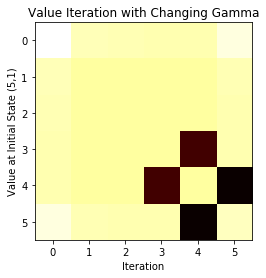

invader



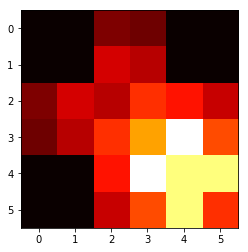

1
1
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


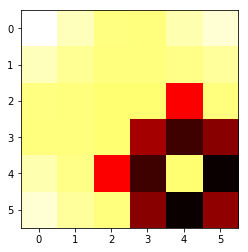

invader



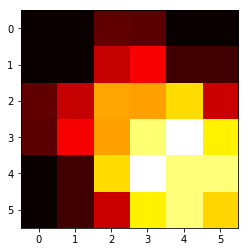

2
2
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


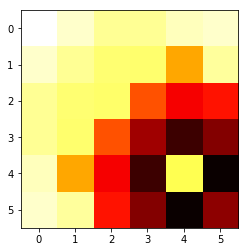

invader



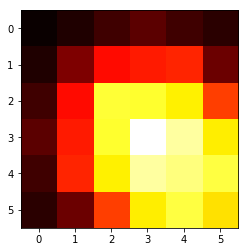

3
3
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


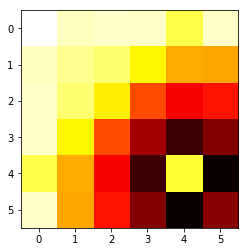

invader



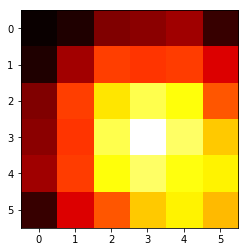

4
4
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


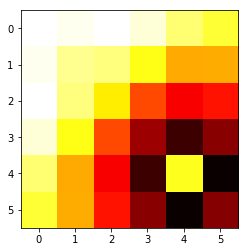

invader



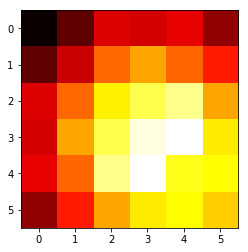

5
5
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


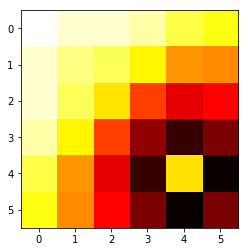

invader



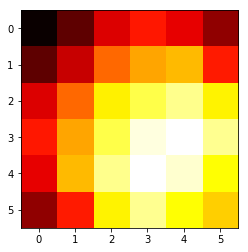

6
6
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


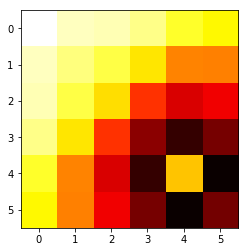

invader



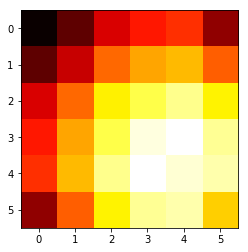

7
7
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


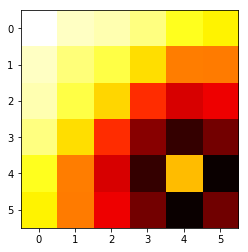

invader



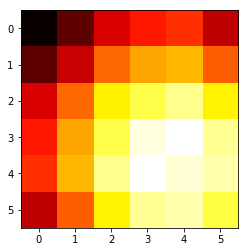

8
8
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


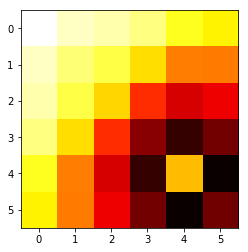

invader



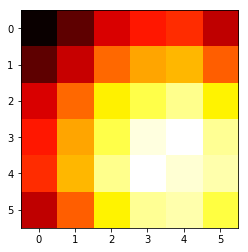

9
9
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]


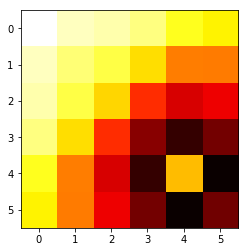

invader



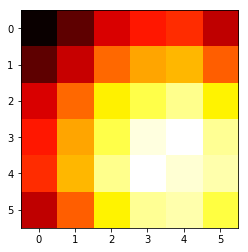

10
10
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.

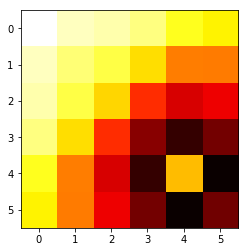

invader



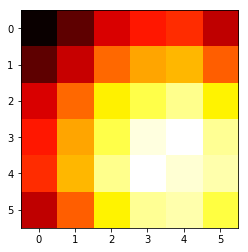

11
11
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.

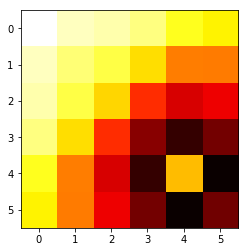

invader



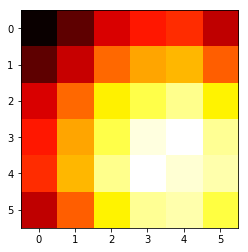

12
12
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.

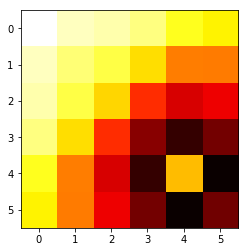

13
13
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.

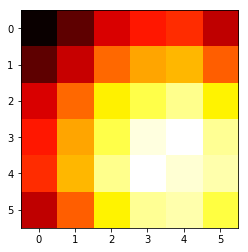

14
14
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
     fun: -0.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0., 0., 0., 0., 1., 1., 1.])
  status: 0
 success: True
       x: array([1., 0., 0., 0., 0.])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.

In [9]:
runvi=run_value_iteration()

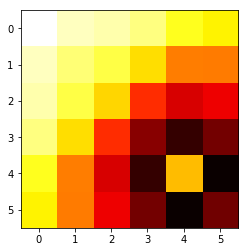

In [34]:
x = heatmap("defender", runvi[0])

In [35]:
x


array([[ 43.55783999,  35.84553042,  33.41933256,  27.74610266,
         15.81749078,  10.15855158],
       [ 35.84553042,  26.63629371,  20.59914142,   6.34438061,
        -11.55660602, -12.03287269],
       [ 33.41933256,  20.59914142,   4.77458143, -26.45683518,
        -41.97349412, -37.75903851],
       [ 27.74610266,   6.34438061, -26.45683518, -56.25694444,
        -71.94444444, -60.35572656],
       [ 15.81749078, -11.55660602, -41.97349412, -71.94444444,
          0.        , -79.72222222],
       [ 10.15855158, -12.03287269, -37.75903851, -60.35572656,
        -79.72222222, -60.81944444]])

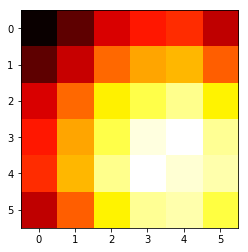

In [36]:
x = heatmap("invader", runvi[0])

In [23]:
x


array([[ 2.38159722,  4.34954861, 10.40845486, 13.70702344, 10.98099256,
        12.01050326],
       [ 4.34954861,  6.51805556, 15.35173611, 19.43071181, 16.33407205,
        17.23170436],
       [10.40845486, 15.35173611, 24.42361111, 28.73993056, 26.44321181,
        25.31160677],
       [13.70702344, 19.43071181, 28.73993056, 33.39652778, 32.845625  ,
        31.2450434 ],
       [10.98099256, 16.33407205, 26.44321181, 32.845625  ,  0.        ,
        28.31415252],
       [12.01050326, 17.23170436, 25.31160677, 31.2450434 , 28.31415252,
        28.85112251]])

In [37]:
pi

{((1, 1), (1, 2)): array([0., 0., 0., 1.]),
 ((2, 1), (1, 1)): array([1., 0., 0., 0.]),
 ((3, 1), (1, 1)): array([1., 0., 0., 0.]),
 ((4, 1), (1, 1)): array([1., 0., 0., 0.]),
 ((5, 1), (1, 1)): array([1., 0., 0., 0.]),
 ((6, 1), (1, 1)): array([0., 1., 0., 0.]),
 ((1, 1), (1, 3)): array([0., 0., 0., 1.]),
 ((2, 1), (1, 2)): array([0., 0., 0., 1.]),
 ((3, 1), (1, 2)): array([1., 0., 0., 0.]),
 ((4, 1), (1, 2)): array([1., 0., 0., 0.]),
 ((5, 1), (1, 2)): array([1., 0., 0., 0.]),
 ((6, 1),
  (1,
   2)): array([1.11022302e-16, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 ((1, 1), (1, 4)): array([1., 0., 0., 0.]),
 ((2, 1), (1, 3)): array([1., 0., 0., 0.]),
 ((3, 1), (1, 3)): array([1., 0., 0., 0.]),
 ((4, 1), (1, 3)): array([1., 0., 0., 0.]),
 ((5, 1), (1, 3)): array([1., 0., 0., 0.]),
 ((6, 1),
  (1,
   3)): array([1.11022302e-16, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 ((1, 1), (1, 5)): array([1., 0., 0., 0.]),
 ((2, 1), (1, 4)): array([1., 0., 0., 0.]),
 ((3, 1), (1, 

### Run Value Iteration

In [2]:
from scipy.stats.kde import gaussian_kde


def plot_map(self):
# A procedure for plotting the final value function(s) as a 2D heatmap.
# Here, you need to create two plots: 
#    1) The first plot shows the final value function from the invader's 
#    perspective as a function of the invader's starting position, 
#    when the defender starting position is fixed at x = 0; y = 5. 
#    2) Similarly, the second plot shows the final value function from the defender's
#    perspective as a function of the defender's starting position when the invader's 
#    starting position is fixed at x = 0; y = 0.
    print("need to figure out how to heatmap")
    
    k = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    fig = plt.figure(figsize=(6,8))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
    ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

    ax1.set_xlim(x.min(), x.max())
    ax1.set_ylim(y.min(), y.max())
    ax2.set_xlim(x.min(), x.max())
    ax2.set_ylim(y.min(), y.max())

    ax1.set_xlabel('Vader Score')
    ax1.set_ylabel('Rating')

    ax2.set_xlabel('Vader Score')
    ax2.set_ylabel('Rating')

def initialize_plot():
    plt.plot()
    plt.ylabel('Value at Initial State (5,1)')
    plt.xlabel('Iteration')
    plt.title("Value Iteration with Changing Gamma")    
    return plt

def run_value_iteration():
# A procedure for the main loop of the value iteration algorithm. 
# This procedure should be responsible for initializing the value function(s), 
# performing the iterations to update the value function(s), and monitoring convergence. 
# Your algorithm should stop as soon as the delta, 
# the maximum absolute change in the value function between iteration k - 1 and 
# iteration k is less than 1e-6. At the end of this procedure, 
# you should plot the delta value at each iteration as a line plot. 
# You should also plot the final value functions as heatmaps as described in the previous bullet point. 
# You should run your algorithm by creating a python file called run_value_iteration.py that runs your experiment. You may use gamma = 0:95.

    # run value iteration code here
    invaderdefender = InvaderDefender()
    init_vals= {}
    plt = initialize_plot()
    #gammaRange = [0.95]
    #finalPolicyDf = pd.DataFrame(index=gridworld.states(), columns=gammaRange)

    gamma = 0.95
    
    value = ValueIteration(invaderdefender, gamma)
    U, pi = value.value_iteration()
    
    return U, pi

    #create plot
    #V = value.get_U()
    #init_vals[gamma] = [V[v][(5,1)] for v in V]
    #plt.plot(init_vals[gamma], label = gamma)

    #get final policy for each gamma
    #finalPolicyDf[gamma]=pd.DataFrame.from_dict(value.get_pi(), orient='index')[0]

    #plt.legend()
    #plt.show()

    #print(finalPolicyDf)

In [19]:
runvi[0]

gridstates = [
            (1,1),(1,2),(1,3),(1,4),(1,5),(1,6),
            (2,1),(2,2),(2,3),(2,4),(2,5),(2,6),
            (3,1),(3,2),(3,3),(3,4),(3,5),(3,6),
            (4,1),(4,2),(4,3),(4,4),(4,5),(4,6),
            (5,1),(5,2),(5,3),(5,4),(5,5),(5,6),
            (6,1),(6,2),(6,3),(6,4),(6,5),(6,6)
            ]

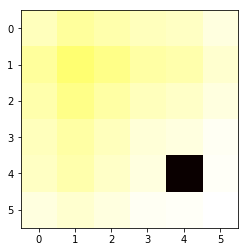

In [88]:
plt.imshow(twodim, cmap='hot', interpolation='nearest')
plt.show()

In [27]:
def heatmap(playerstr, U):
    gridstates = [
            (1,1),(1,2),(1,3),(1,4),(1,5),(1,6),
            (2,1),(2,2),(2,3),(2,4),(2,5),(2,6),
            (3,1),(3,2),(3,3),(3,4),(3,5),(3,6),
            (4,1),(4,2),(4,3),(4,4),(4,5),(4,6),
            (5,1),(5,2),(5,3),(5,4),(5,5),(5,6),
            (6,1),(6,2),(6,3),(6,4),(6,5),(6,6)
            ]
    if playerstr == 'defender':
        player = 0
    else:            # invader
        player = 1
    
    tensordict = {}

    for gridstate in gridstates:
        cell = []
        for x,y in U.items():
            if x[player] == gridstate:
                cell.append(y)
        cell = np.average(cell)
        tensordict[gridstate] = cell
    
    twodim = np.zeros([6,6])

    for x, y in tensordict.items():
        twodim[x[0]-1][x[1]-1] = y
            
    plt.imshow(twodim, cmap='hot', interpolation='nearest')
    plt.show()
    return twodim

((1, 1), (1, 2))
((1, 1), (1, 3))
((1, 1), (1, 4))
((1, 1), (1, 5))
((1, 1), (1, 6))
((1, 1), (2, 1))
((1, 1), (2, 2))
((1, 1), (2, 3))
((1, 1), (2, 4))
((1, 1), (2, 5))
((1, 1), (2, 6))
((1, 1), (3, 1))
((1, 1), (3, 2))
((1, 1), (3, 3))
((1, 1), (3, 4))
((1, 1), (3, 5))
((1, 1), (3, 6))
((1, 1), (4, 1))
((1, 1), (4, 2))
((1, 1), (4, 3))
((1, 1), (4, 4))
((1, 1), (4, 5))
((1, 1), (4, 6))
((1, 1), (5, 1))
((1, 1), (5, 2))
((1, 1), (5, 3))
((1, 1), (5, 4))
((1, 1), (5, 5))
((1, 1), (5, 6))
((1, 1), (6, 1))
((1, 1), (6, 2))
((1, 1), (6, 3))
((1, 1), (6, 4))
((1, 1), (6, 5))
((1, 1), (6, 6))
((1, 1), (1, 1))
((1, 2), (1, 1))
((1, 2), (1, 3))
((1, 2), (1, 4))
((1, 2), (1, 5))
((1, 2), (1, 6))
((1, 2), (2, 1))
((1, 2), (2, 2))
((1, 2), (2, 3))
((1, 2), (2, 4))
((1, 2), (2, 5))
((1, 2), (2, 6))
((1, 2), (3, 1))
((1, 2), (3, 2))
((1, 2), (3, 3))
((1, 2), (3, 4))
((1, 2), (3, 5))
((1, 2), (3, 6))
((1, 2), (4, 1))
((1, 2), (4, 2))
((1, 2), (4, 3))
((1, 2), (4, 4))
((1, 2), (4, 5))
((1, 2), (4, 6

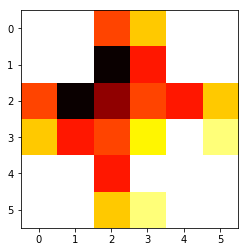

In [35]:
array = heatmap("defender", runvi[0])

In [4]:
array = heatmap("invader", runvi[0])

NameError: name 'heatmap' is not defined

In [32]:
runvi[0]

{((1, 1), (1, 2)): 0.0,
 ((2, 1), (1, 1)): 0.0,
 ((3, 1), (1, 1)): -80.0,
 ((4, 1), (1, 1)): -0.0,
 ((5, 1), (1, 1)): -0.0,
 ((6, 1), (1, 1)): -0.0,
 ((1, 1), (1, 3)): -0.0,
 ((2, 1), (1, 2)): 0.0,
 ((3, 1), (1, 2)): -0.0,
 ((4, 1), (1, 2)): -0.0,
 ((5, 1), (1, 2)): -0.0,
 ((6, 1), (1, 2)): -0.0,
 ((1, 1), (1, 4)): -0.0,
 ((2, 1), (1, 3)): -0.0,
 ((3, 1), (1, 3)): -0.0,
 ((4, 1), (1, 3)): -0.0,
 ((5, 1), (1, 3)): -0.0,
 ((6, 1), (1, 3)): -0.0,
 ((1, 1), (1, 5)): -0.0,
 ((2, 1), (1, 4)): -0.0,
 ((3, 1), (1, 4)): -0.0,
 ((4, 1), (1, 4)): -0.0,
 ((5, 1), (1, 4)): -0.0,
 ((6, 1), (1, 4)): -0.0,
 ((1, 1), (1, 6)): -0.0,
 ((2, 1), (1, 5)): -0.0,
 ((3, 1), (1, 5)): -0.0,
 ((4, 1), (1, 5)): -0.0,
 ((5, 1), (1, 5)): -0.0,
 ((6, 1), (1, 5)): -0.0,
 ((1, 1), (2, 1)): 0.0,
 ((2, 1), (1, 6)): -0.0,
 ((3, 1), (1, 6)): -0.0,
 ((4, 1), (1, 6)): -0.0,
 ((5, 1), (1, 6)): -0.0,
 ((6, 1), (1, 6)): -0.0,
 ((1, 1), (2, 2)): 0.0,
 ((2, 1), (2, 2)): 0.0,
 ((3, 1), (2, 1)): 0.0,
 ((4, 1), (2, 1)): -0.0,
 ((5, 

In [82]:
twodim = np.zeros([6,6])

for x, y in tensordict.items():
    twodim[x[0]-1][x[1]-1] = y

[[-0.         -0.          2.22222222  1.38888889 -0.         -0.        ]
 [-0.         -0.          4.16666667  2.5        -0.         -0.        ]
 [ 2.22222222  4.16666667  3.33333333  2.22222222  2.5         1.38888889]
 [ 1.38888889  2.5         2.22222222  1.11111111 -0.          0.55555556]
 [-0.         -0.          2.5        -0.         -0.         -0.        ]
 [-0.         -0.          1.38888889  0.55555556 -0.         -0.        ]]


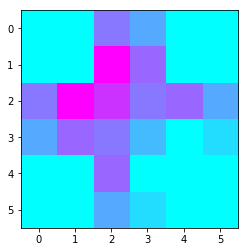

In [37]:
print(array*-1)
invader = array*-1
plt.imshow(invader, cmap='cool', interpolation='nearest')
plt.show()

In [84]:
from scipy.stats.kde import gaussian_kde

In [72]:
for x, y,z in runvi[0].items():
    print(x)
    print(y)

ValueError: not enough values to unpack (expected 3, got 2)